In [0]:
!pip install dtcwt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pywt as pw
import dtcwt
from google.colab import drive
####
drive.mount('/content/gdrive')
!unzip ecg_data.zip
%cd /content/gdrive/My\ Drive
%cd ECG\ noise\ reduction\ data/
%cd Forced\ muscle\ contraction\ noise\ data
!ls
dat = pd.read_csv('AK-1-Raw signal.csv')

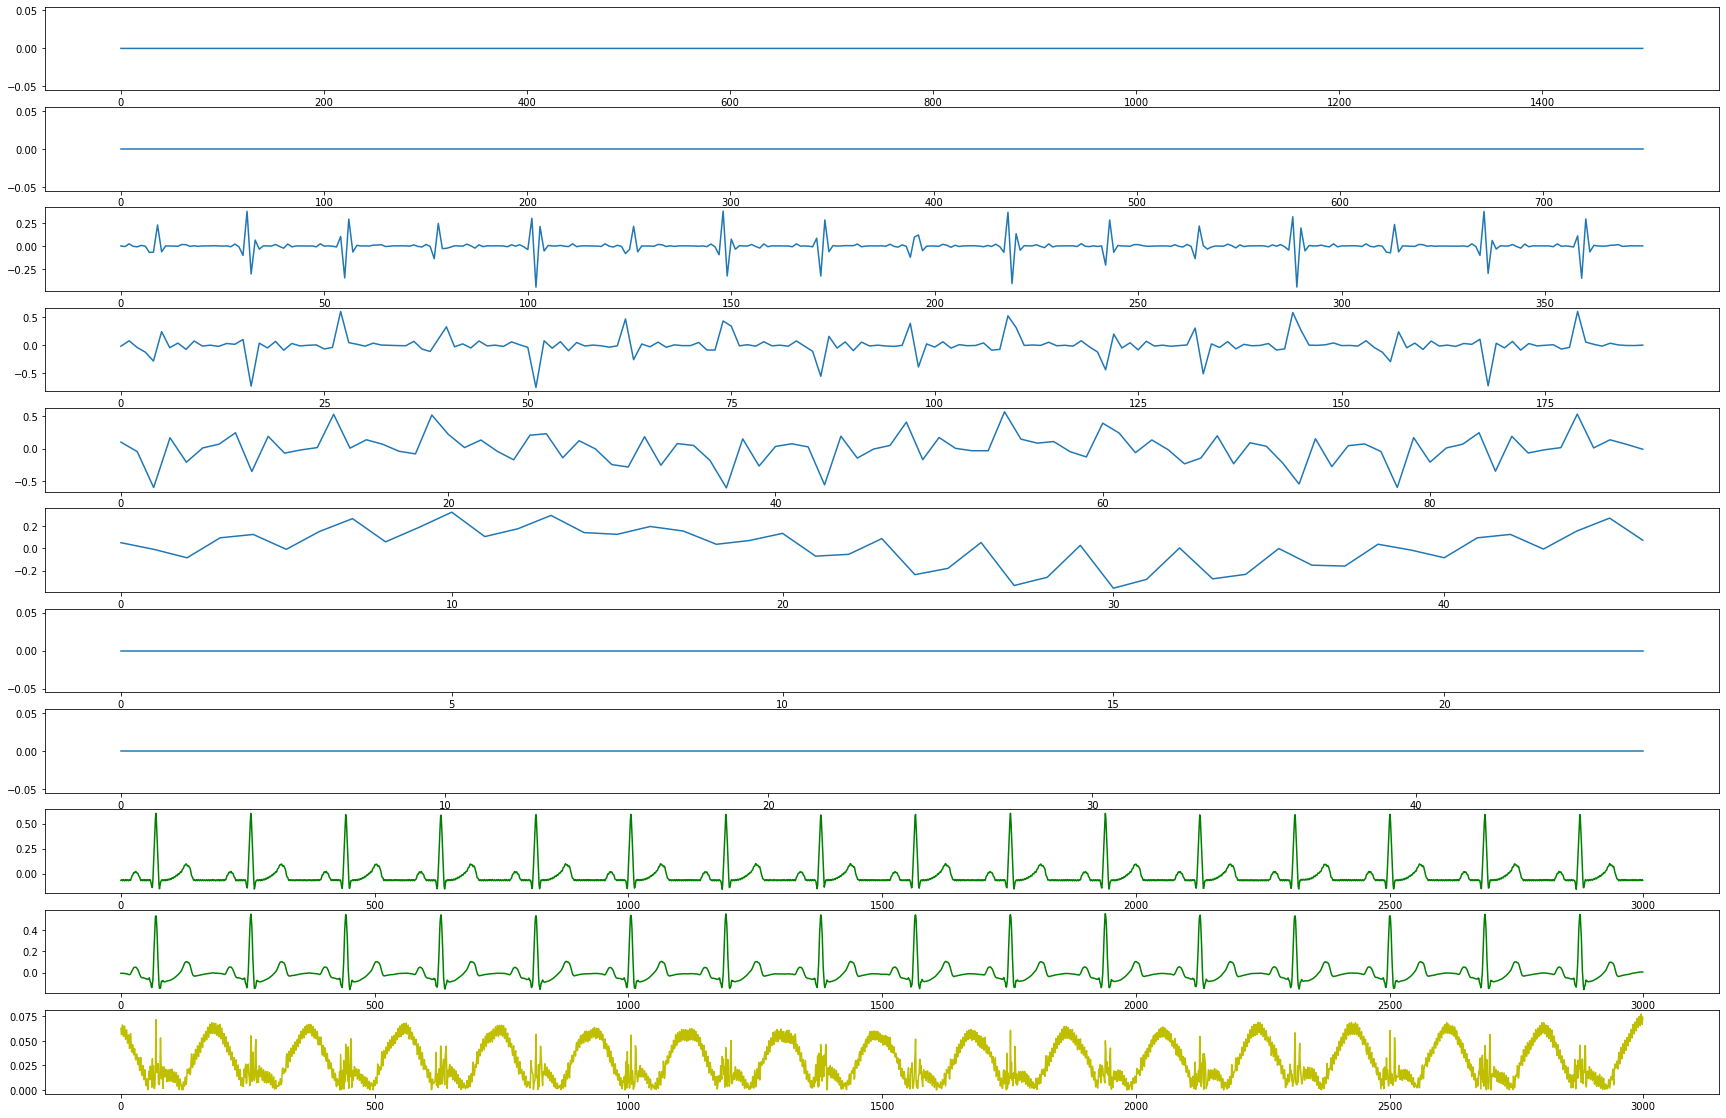

In [0]:
fs = 256
fr = np.int(0)
cut = np.int(3e3)
ecg = dat.iloc[fr:cut,2]
n_lvl = 7

transform = dtcwt.Transform1d()
coefs = transform.forward(ecg, nlevels=n_lvl)

clr = [0, 1 , -1]
coefs.lowpass *= 0
cfs = list(coefs.highpasses)
for i in clr:
  cfs[i] *= 0

fig,ax = plt.subplots(n_lvl+4, 1, figsize=[30, 20])
for i in range(n_lvl):
  ax[i].plot(np.real(coefs.highpasses[i]))
ax[n_lvl].plot(coefs.lowpass)

cfs = tuple(cfs)
coefs.highpasses = cfs

rec = transform.inverse(coefs)
ax[n_lvl+1].plot(ecg,'g')
ax[n_lvl+2].plot(rec,'g')
ax[n_lvl+3].plot(np.abs(rec-ecg),'y')

In [0]:
uwrp = []
lims = []
unpack = lambda pack : [element for tupl in pack for element in tupl]
for i in range(n_lvl):
  uwrp.append( unpack(cfs[i]) )

win = 12
trsh = .3
len0 = len(uwrp[0])
len1 = len(uwrp[1])
len2 = len(uwrp[2])
filt0 = np.zeros(len0, dtype=np.csingle)
filt1 = np.zeros(len1, dtype=np.csingle)
filt2 = np.zeros(len2, dtype=np.csingle)
for i in range(win, leng, win):
  sl0 = slice(i-win,i)
  sl1 = slice(i//2-win//2,i//2)
  sl2 = slice(i//4-win//4,i//4)
  if np.sum(np.abs(uwrp[0][sl0])) < trsh:
    filt0[sl0] = uwrp[0][sl0]
    filt1[sl1] = uwrp[1][sl1]
    filt2[sl2] = uwrp[2][sl2]
l0 = []
l1 = []
l2 = []
for i in range(len0):
  l0.append(np.array(filt0[i]))
for i in range(len1):
  l1.append(np.array(filt1[i]))
for i in range(len2):
  l2.append(np.array(filt2[i]))
ar0 = np.asarray(l0)
ar1 = np.asarray(l1)
ar2 = np.asarray(l2)

cfss = (ar0,ar1,ar2,coefs.highpasses[3],coefs.highpasses[4],coefs.highpasses[5],coefs.highpasses[6])

coefs.highpasses = cfss
#rec = transform.inverse(coefs)

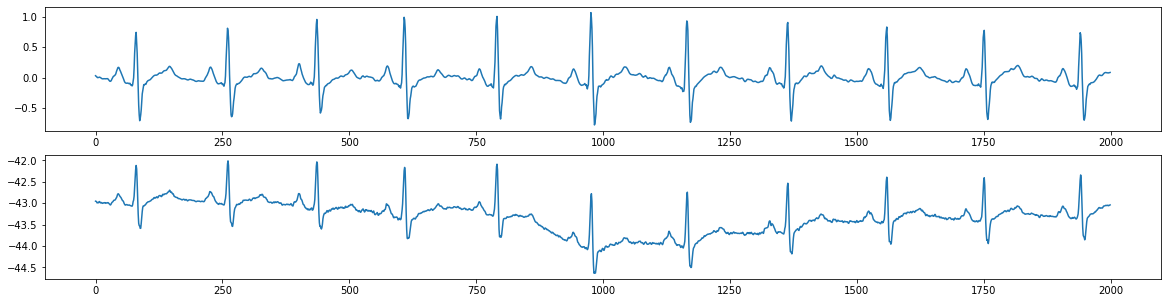

In [0]:
# install complex wavelet transform with pip
!pip install dtcwt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtcwt
# choose file to filter
dat = pd.read_csv('AK-1-Raw signal.csv')
# choose channel (csv file column), begining and end signal limits to filter
chan = 6
beg = 0
end = 2000
ecg = dat.iloc[beg:end, chan]
ecg = np.array(ecg)
# run filtering
rec = filt(ecg)
# plot filtered vs raw
fig,ax = plt.subplots(2,1, figsize=[20, 5])
ax[0].plot(rec)
ax[1].plot(ecg)

In [0]:
# filtering function
def filt(ecg):
  # filtering with complex wavelet transform
  # http://eeweb.poly.edu/iselesni/pubs/CWT_Tutorial.pdf
  # number of levels in transform
  n_lvl = 7
  # direct transform
  transform = dtcwt.Transform1d()
  # retrieve coefs
  leng = ecg.shape[0]
  coefs = transform.forward(ecg[:leng//2*2], nlevels=n_lvl)
  # coefs to filter
  clr = [0, 1]
  # filtering first and last wavelet coefs refering to high and low freqs
  coefs.lowpass *= 0
  cfs = list(coefs.highpasses)
  for i in clr:
    cfs[i] *= 0
  cfs = tuple(cfs)
  coefs.highpasses = cfs
  # inverse transform
  rec = transform.inverse(coefs)
  # return reconstructed filtered signal
  return rec

In [0]:
%cd /content/gdrive/My\ Drive
%cd ECG\ noise\ reduction\ data/
%cd Forced\ muscle\ contraction\ noise\ data
!ls